In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Load the MNIST dataset
mnist = tf.keras.datasets.mnist

In [23]:
#Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

In [24]:
#Reshaping Training and Testing Inmages
training_images =training_images.reshape(60000, 28, 28, 1)
testing_images = testing_images.reshape(10000, 28, 28, 1)

In [25]:
#Normalize the pixel values of the train and test image
training_images= training_images/255.0
testing_images= testing_images/255.0

In [26]:
#Add Convolution and map pooling layers
L0 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1))
L1 = tf.keras.layers.MaxPooling2D(2, 2)

In [27]:
#Add the same layers of model as before
L2 = tf.keras.layers.Flatten()
L3 = tf.keras.layers.Dense(128, activation='relu')   #detect the rule between L0 and L2
L4 = tf.keras.layers.Dense(10, activation='softmax') #shape of classes

In [28]:
#Building the Classification model
model = tf.keras.models.Sequential([L0,L1,L2,L3,L4])

In [29]:
#Print the model summary using .summary fn().
#5408 -> 13 * 13 * 32 
#Missed 2 pixels from the pixel in the corner which has no left of upper neighbours.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [30]:
#Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [31]:
#Using callbacks to stop training when it reaches a specific value for some metric
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #Check the accuracy
    if(logs.get('accuracy') >= 0.998): # Experiment with changing this value
      #Stop if Threshold is met
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

In [32]:
#Instantiate callback class & Train the model
callbacks = myCallback()
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1450 - accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0321 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0086 - accuracy: 0.9970
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9984
Reached 99.8% accuracy so cancelling training!
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0056 - accuracy: 0.9984


In [33]:
#Model History Keys
history.history.keys()

dict_keys(['loss', 'accuracy'])

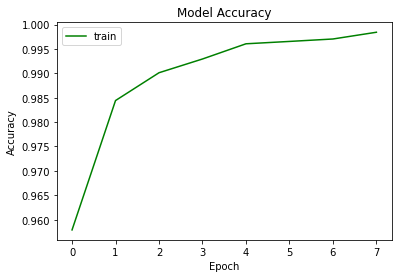

In [57]:
#Plot Accuracy Curve 
plt.plot(history.history['accuracy'], 'g')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

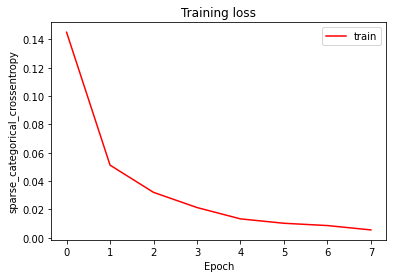

In [56]:
#Plot Loss Curve 
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.legend(['train'], loc='upper right')
plt.show()

In [58]:
#Evaluate the model on unseen data
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0516 - accuracy: 0.9878


[0.05161655321717262, 0.9878000020980835]